In [21]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# this assumes astropy is installed, let me know if there's an issue
import astropy.coordinates as coord
from astropy.table import Table
import astropy.units as u

In [22]:
# this is optional, but my default has too small axis labels, so I've included the setup file as well
plt.style.use('notebook')

## Reading in the data table

First, download the data table here: https://cdsarc.unistra.fr/viz-bin/cat/J/MNRAS/484/2832

Under the ftp tab, there is an option to download a fits file, which is a standard format for storing astronomical data (both images and data tables, as is our case).

I've saved the table as gc_vasiliev.fits in the data folder one level above the current one. We can then read the table using astropy functionality:

In [23]:
t = Table.read('../data/gc_vasiliev.fits')

You can view the (abbreviated) table contents by just typing the table name in the jupyter notebook cell:

In [24]:
t

Name,OName,RAdeg,DEdeg,Dist,HRV,e_HRV,pmRA,pmDE,e_pmRA,e_pmDE,corr,Rscale,Nstar
,,deg,deg,kpc,km / s,km / s,mas / yr,mas / yr,mas / yr,mas / yr,,arcmin,
bytes11,bytes10,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int32
NGC 104,47 Tuc,6.024,-72.081,4.5,-17.21,0.18,5.237,-2.524,0.039,0.039,-0.002,18.3,23917
NGC 288,,13.188,-26.583,8.9,-44.83,0.13,4.252,-5.641,0.053,0.052,0.019,6.1,2544
NGC 362,,15.809,-70.849,8.6,223.26,0.28,6.730,-2.535,0.053,0.052,-0.004,7.8,1741
Whiting 1,,30.738,-3.253,30.1,-130.41,1.79,-0.234,-1.782,0.115,0.094,-0.050,0.5,11
NGC 1261,,48.068,-55.216,16.3,71.36,0.24,1.632,-2.038,0.057,0.057,0.009,4.1,541
Pal 1,,53.334,79.581,11.1,-75.41,0.21,-0.171,0.070,0.074,0.081,0.003,0.7,51
E 1,AM 1,58.760,-49.615,123.3,118.00,14.14,0.387,-0.406,0.129,0.167,-0.073,0.4,39
Eridanus,,66.185,-21.187,90.1,-23.79,1.07,0.493,-0.402,0.084,0.087,-0.133,0.8,15


## Equatorial coordinates

The full description of table columns is available here: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/MNRAS/484/2832 For now, we will be using the RAdeg, DEdeg, and Dist columns, which provide the equatorial sky coordinates and distances from the Sun of 150 globular clusters in the Milky Way.

To plot them, we can use the standard matplotlib functions. Here I am showing the sky positions (RA and Dec), and to make the comparison easier, I also set the x and y axis to have equal aspect:

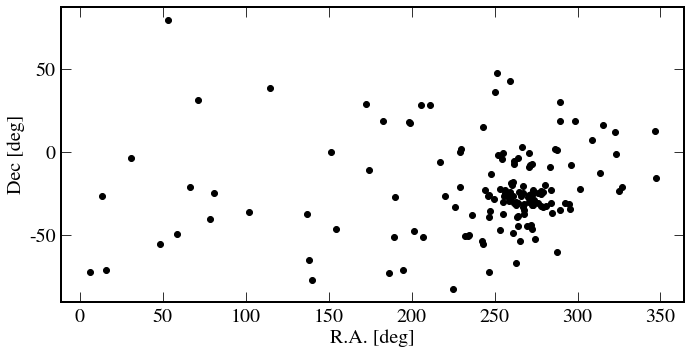

In [7]:
plt.figure(figsize=(10,6))

plt.plot(t['RAdeg'], t['DEdeg'], 'ko')

plt.gca().set_aspect('equal')
plt.xlabel('R.A. [deg]')
plt.ylabel('Dec [deg]')

plt.tight_layout()

### Discussion questions:
- How are globular clusters distributed on the sky?
- Is the distribution uniform?
- Is it symmetric?
- How could we answer these questions quantitatively?

## Galactic coordinates

The equatorial coordinates are sky coordinates based on the Earth's longitude and latitude, and helpful when planning observations. When studying objects in the Milky Way, it is often more insightful to use galactic coordinates. It is very easy to convert between these coordinate systems (they are just rotated with respect to each other), and astropy has functionality to do that.

The first step is to construct an astropy coordinate object:

In [25]:
c = coord.SkyCoord(ra=t['RAdeg'], dec=t['DEdeg'], distance=t['Dist'], frame='icrs')

The resulting object contains the RA, Dec sky positions, and distances. Note that all of these have units, which were originally stored in the data table, and passed to this object.

In [26]:
c

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, kpc)
    [(  6.024, -7.2081e+01,   4.5), ( 13.188, -2.6583e+01,   8.9),
     ( 15.809, -7.0849e+01,   8.6), ( 30.738, -3.2530e+00,  30.1),
     ( 48.068, -5.5216e+01,  16.3), ( 53.334,  7.9581e+01,  11.1),
     ( 58.76 , -4.9615e+01, 123.3), ( 66.185, -2.1187e+01,  90.1),
     ( 71.525,  3.1381e+01,  27.2), ( 78.528, -4.0047e+01,  12.1),
     ( 81.046, -2.4525e+01,  12.9), (102.248, -3.6005e+01,  10.8),
     (114.535,  3.8882e+01,  82.6), (136.991, -3.7221e+01,  39.4),
     (138.013, -6.4864e+01,   9.6), (140.238, -7.7282e+01,   8.1),
     (151.383,  7.2000e-02,  92.5), (154.403, -4.6412e+01,   4.9),
     (172.32 ,  2.8974e+01, 108.7), (174.067, -1.0877e+01, 145. ),
     (182.526,  1.8543e+01,  19.3), (186.439, -7.2659e+01,   5.8),
     (189.667, -5.1150e+01,  21.2), (189.867, -2.6744e+01,  10.3),
     (194.891, -7.0876e+01,   6.6), (198.23 ,  1.8168e+01,  17.9),
     (199.113,  1.7700e+01,  17.4), (201.697, -4.7480e+01,   5.2),
     

To create the exact same plot as before, we can just access the right ascensions with c.ra and declinations with c.dec:

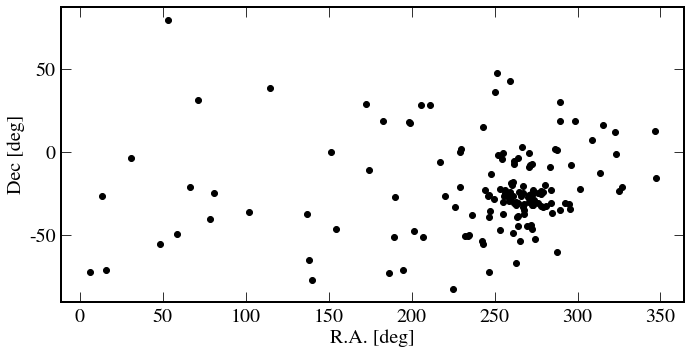

In [11]:
plt.figure(figsize=(10,6))

plt.plot(c.ra, c.dec, 'ko')

plt.gca().set_aspect('equal')
plt.xlabel('R.A. [deg]')
plt.ylabel('Dec [deg]')

plt.tight_layout()

So far, we haven't really changed what we got, but now we will! The reason for storing coordinates in the astropy coordinates object is to be able to easily transform them to a different coordinate system. For example, we can get galactic coordinates with:

In [28]:
cgal = c.transform_to(coord.Galactic)

Now we'll check what is stored in this new object. Note that still there are 2 sky positions in degrees (labeled l, which corresponds to galactic longitude, and b, galactic latitude), and one distance coordinate:

In [29]:
cgal

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, kpc)
    [(3.05894709e+02, -44.88962984,   4.5),
     (1.51265706e+02, -89.38096779,   8.9),
     (3.01533201e+02, -46.24719746,   8.6),
     (1.61618671e+02, -60.63577879,  30.1),
     (2.70538176e+02, -52.12425693,  16.3),
     (1.30064950e+02,  19.02807491,  11.1),
     (2.58360821e+02, -48.4705418 , 123.3),
     (2.18106085e+02, -41.33262801,  90.1),
     (1.70530820e+02,  -9.07227739,  27.2),
     (2.44513746e+02, -35.03616626,  12.1),
     (2.27230587e+02, -29.35013984,  12.9),
     (2.45628457e+02, -16.00590015,  10.8),
     (1.80369441e+02,  25.24128906,  82.6),
     (2.61319191e+02,   6.99772132,  39.4),
     (2.82193429e+02, -11.25290274,   9.6),
     (2.92268350e+02, -19.01706068,   8.1),
     (2.40141157e+02,  41.86487889,  92.5),
     (2.77228277e+02,   8.64060935,   4.9),
     (2.02309349e+02,  71.8026106 , 108.7),
     (2.74807164e+02,  47.84763391, 145. ),
     (2.52846340e+02,  77.1895644 ,  19.3),
     (3.00993111e+

Now, let's plot these galactic coordinates first:

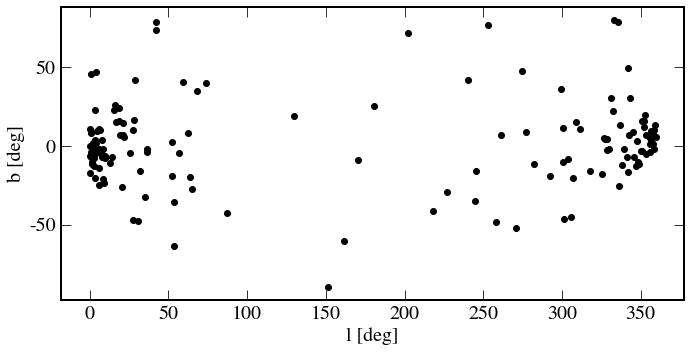

In [30]:
plt.figure(figsize=(10,6))

plt.plot(cgal.l, cgal.b, 'ko')

plt.gca().set_aspect('equal')
plt.xlabel('l [deg]')
plt.ylabel('b [deg]')

plt.tight_layout()

Here the globular clusters are clustered around 0 and 360 degrees. Since longitude l is a degree, it connects at 0 and 360, so a better way to plot this would be to convert these values between -180 and 180, instead of 0 and 360.

Astropy comes in handy again, because now it knows that l is an angle and that it wraps around, by default between 0 and 360. However, we can change that easily, and ask to wrap at 180 deg by using `cgal.l.wrap_at(180*u.deg)` instead of `cgal.l`.

Note that we need to pass a unit when wrapping. Astropy has a unit module, which is usually imported as `import astropy.units as u`. The unit of a degree is then `u.deg` or `u.degree`, and you can just multiply a numerical value by its unit to get the correct quantity. For more information on units in astropy, see here: https://docs.astropy.org/en/stable/units/

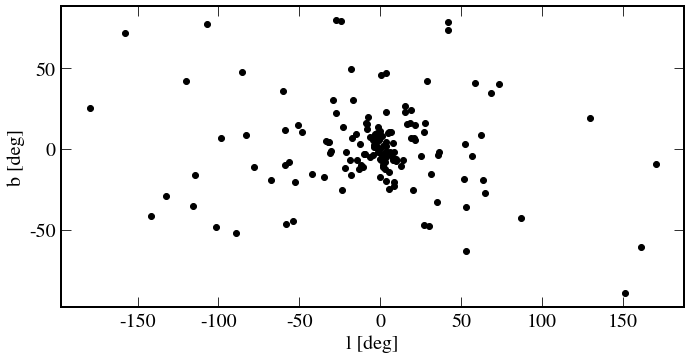

In [31]:
plt.figure(figsize=(10,6))

plt.plot(cgal.l.wrap_at(180*u.deg), cgal.b, 'ko')

plt.gca().set_aspect('equal')
plt.xlabel('l [deg]')
plt.ylabel('b [deg]')

plt.tight_layout()

### Discussion questions:
- How is the distribution of globular clusters in galactic coordinates different from the one in equatorial coordinates?
- Is this one uniform or symmetric?
- How does it compare quantitatively to the equatorial one?

As a bonus in this section, here is how to plot sky coordinates in a different projection (I used Mollweide here, which shows the full sky, and you might have encountered it working on the SPHEREx project).

A note here: matplotlib expects values in radians instead of degrees when using these projections. Again, astropy quantities are helpful here, because we can get the value of an angle in radians by just asking for `cgal.b.radian` and similarly for the longitude.

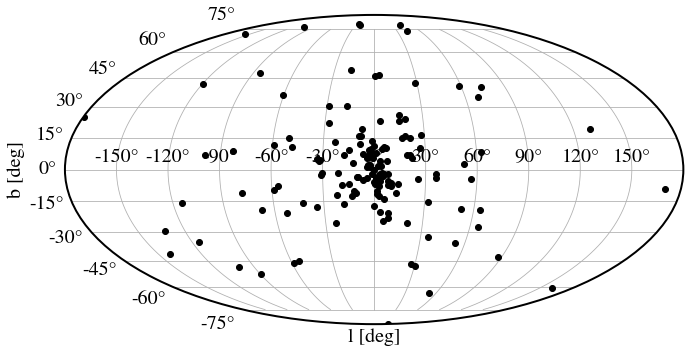

In [32]:
plt.figure(figsize=(10,6))
plt.subplot(projection='mollweide')

plt.plot(cgal.l.wrap_at(180*u.deg).radian, cgal.b.radian, 'ko')

plt.xlabel('l [deg]')
plt.ylabel('b [deg]')
plt.grid(True)

plt.tight_layout()